# Pure vapour-liquid equilibrium properties

In [1]:
import Pkg
Pkg.status("Clapeyron")

Project Clapeyron v0.6.13
No Matches in `/mnt/c/Users/darshanraju/OneDrive - Delft University of Technology/Desktop/Clapeyron/Clapeyron.jl/Project.toml`


In [2]:
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

PyPlot

In this notebook, we give additional examples of pure component vapour-liquid equilibrium properties users can obtain in `Clapeyron.jl`. Many examples have been given in other notebooks; as such, we focus on those functionalities not illustrated elsewhere.

## Saturation curve of water

A simple example to start with, let us obtain the saturation curve of water.

First generating the model:

In [3]:
model = PR(["water"])

PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule} with 1 component:
 "water"
Contains parameters: a, b, Tc, Pc, Mw

We then need to obtain the critical point (since that will be the end-point of our curve):

In [4]:
(Tc, pc, vc) = crit_pure(model)

(647.13, 2.19e7, 7.552440558745412e-5)

From here, choosing an arbitrary low temperature, we can trace the saturation curve up to the critical point. To avoid numerical issues, we will use the solution of the previous iteration as the initial guess for the next iteration:

In [5]:
N    = 100

T    = LinRange(298.15, Tc,  N)
psat = zeros(N)
vl   = zeros(N)
vv   = zeros(N)

v0   = nothing 

hL   = zeros(N)
hV   = zeros(N)
cpL  = zeros(N)
cpV  = zeros(N)

for i in 1:N
    if i==1
        sat = saturation_pressure(model, T[i])
        psat[i] = sat[1]
        vl[i] = sat[2]
        vv[i] = sat[3]
        v0 = [vl[i],vv[i]]
        println("Saturation at T = ", T[i], " K: psat = ", psat[i], ", vl = ", vl[i], ", vv = ", vv[i])
    else
        sat = saturation_pressure(model, T[i]; v0=v0)
        psat[i] = sat[1]
        vl[i] = sat[2]
        vv[i] = sat[3]
        v0 = [vl[i],vv[i]]
    end

    hL[i]  = Clapeyron.VT_enthalpy(model,vl[i],T[i],[1.])
    hV[i]  = Clapeyron.VT_enthalpy(model,vv[i],T[i],[1.])
    cpL[i] = Clapeyron.VT_isobaric_heat_capacity(model,vl[i],T[i],[1.])
    cpV[i] = Clapeyron.VT_isobaric_heat_capacity(model,vv[i],T[i],[1.])

end

Saturation at T = 298.15 K: psat = 2686.595773329238, vl = 2.1391045835208427e-5, vv = 0.9223325120187751


Plotting:

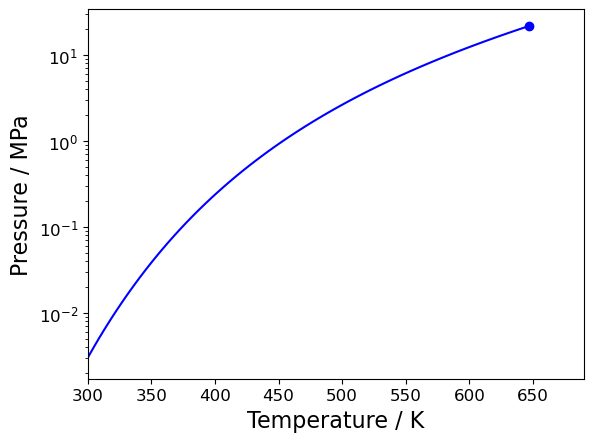

In [6]:
plt.clf()
plt.semilogy(T, psat./1e6, color="blue")
plt.plot([Tc],[pc]./1e6, marker="o",color="blue")
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xlim([300,690])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())

The VLE envelope:

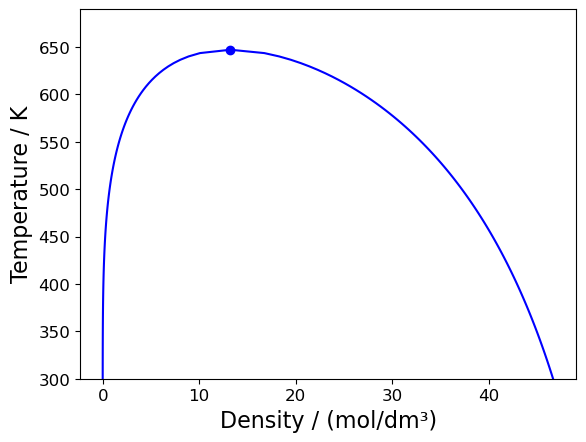

In [7]:
plt.clf()
plt.plot(1e-3 ./vl, T, color="blue")
plt.plot(1e-3 ./vv, T, color="blue")

plt.plot([1e-3/vc],[Tc], marker="o",color="blue")
plt.ylabel("Temperature / K",fontsize=16)
plt.xlabel("Density / (mol/dm³)",fontsize=16)
plt.ylim([300,690])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())

Note that in the above, we also used `Clapeyron.VT_enthalpy(model, V, T, n)` to obtain the saturated properties of water. This was done to ensure that we obtained the property corresponding to the correct phase. Using this to plot the enthalpy of vapourisation:

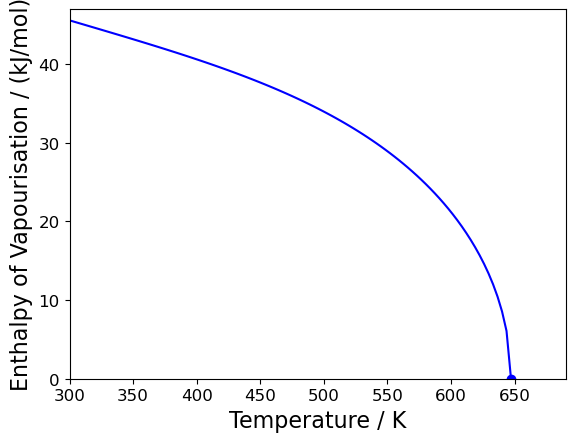

In [8]:
plt.clf()
plt.plot(T, (hV.-hL)./1e3, color="blue")

plt.plot([Tc],[0], marker="o",color="blue")
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Enthalpy of Vapourisation / (kJ/mol)",fontsize=16)
plt.xlim([300,690])
plt.ylim([0,47])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())

And saturated isobaric heat capacities:

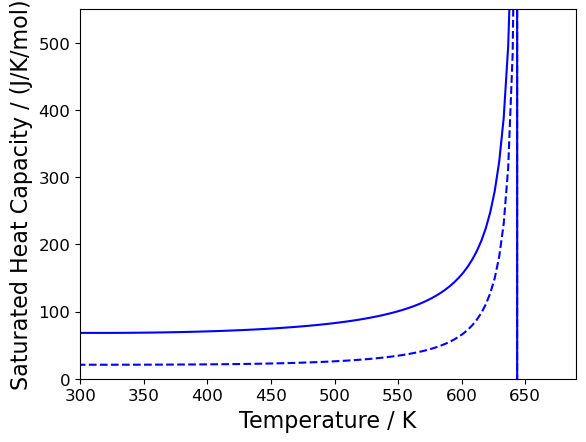

In [9]:
plt.clf()
plt.plot(T, cpL, color="blue")
plt.plot(T, cpV, color="blue",linestyle="--")

# plt.plot([Tc],[0], marker="o",color="blue")
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Saturated Heat Capacity / (J/K/mol)",fontsize=16)
plt.xlim([300,690])
plt.ylim([0,550])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())